In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [3]:
#establece escala de colores
vmin = 0
vmax = 1
#establece brillo
image_bias = 1 

def plot_svd(A):
    n = len(A)
    #image_bias: representa la matriz A invertida
    #cmap: mapa de colores
    imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    #muestra la imagen en una ventana separada
    plt.show()
    #Realiza la descompocición(matriz de vectores singulares izquierdos, los valores singulares y la matriz de vectores singulares derechos) 
    U, S, V = svd(A)


    imgs = []
    #este for recorre los valores de S y los almacena en img
    for i in range(n):
        #np.outer:  calcula el producto externo entre el i-ésimo vector singular izquierdo y el i-ésimo vector singular derecho
        imgs.append(S[i]*np.outer(U[:,i],V[i]))


    #Almacenaremos la suma de imgs
    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)
    
    #Uso de subpltos para generar imagenes y organizarlos en fila
    #fig, axes: es una tupla que contiene la figura y los subgráficos creados.
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    #For para acceder a los subgráficos
    for num, ax in zip(range(n), axes):
        #define mapa de colores
        ax.imshow(image_bias-imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        #establece el title
        ax.set_title(np.round(S[num],2), fontsize=80)
    #muestra la imagen
    plt.show()
    
    fig, axes = plt.subplots(figsize = (n*n,n), nrows = 1, ncols = n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias-combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    #retornamos los valores
    return U,S,V

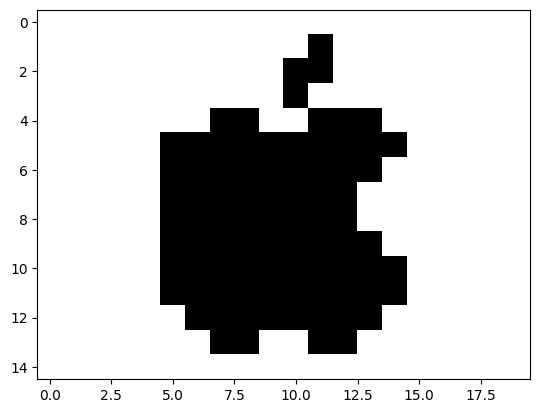

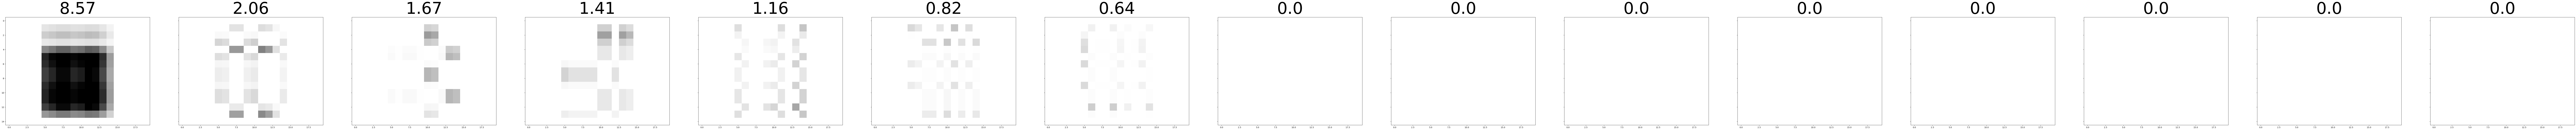

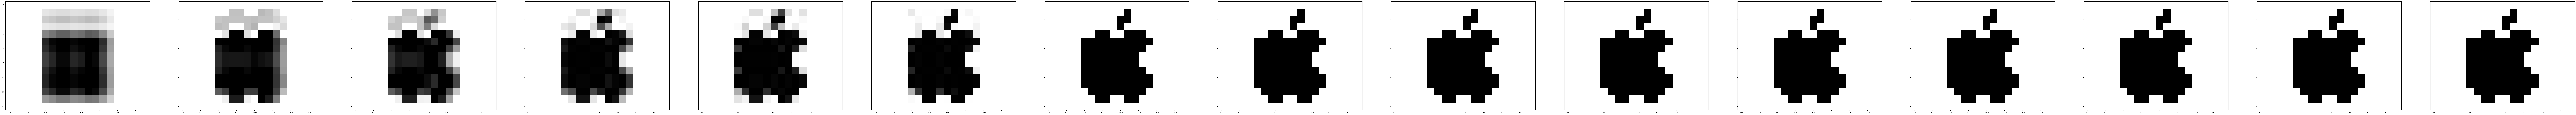

In [4]:
D = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])



U,S,V = plot_svd(D)

In [5]:
print(np.round(U,2))
print()
sigma = np.diag(S)
print(np.round(sigma,2))
print()
print(np.round(V,2))

[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    1.  ]
 [ 0.04  0.18 -0.24 -0.3   0.31  0.59 -0.2   0.43  0.34 -0.04  0.13  0.11
  -0.02  0.    0.  ]
 [ 0.08 -0.03 -0.51 -0.61  0.12  0.02  0.1  -0.43 -0.34  0.04 -0.13 -0.11
   0.02  0.    0.  ]
 [ 0.04 -0.21 -0.27 -0.3  -0.2  -0.57  0.3   0.43  0.34 -0.04  0.13  0.11
  -0.02  0.    0.  ]
 [ 0.2   0.65  0.21 -0.15 -0.12 -0.02  0.34 -0.36  0.32 -0.01  0.3   0.08
  -0.    0.    0.  ]
 [ 0.36 -0.17  0.29 -0.15  0.24 -0.08 -0.05 -0.15  0.25 -0.29 -0.57  0.4
  -0.11  0.    0.  ]
 [ 0.35 -0.05 -0.02  0.08 -0.29  0.29  0.34  0.22 -0.4  -0.58  0.09  0.09
   0.14  0.    0.  ]
 [ 0.31 -0.09 -0.38  0.38  0.14 -0.04 -0.05 -0.21  0.43 -0.23 -0.03 -0.47
   0.29  0.    0.  ]
 [ 0.31 -0.09 -0.38  0.38  0.14 -0.04 -0.05 -0.16 -0.11  0.22  0.33  0.55
  -0.3   0.    0.  ]
 [ 0.35 -0.05 -0.02  0.08 -0.29  0.29  0.34  0.15  0.08  0.59 -0.39 -0.17
  -0.13  0.    0.  ]
 [ 0.36 -0.17  0.29 -0.15  0.24 -0.08 -0.05  0.08 -0.